Gradient boosting using XGBoost technique

In [1]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 0.3/124.9 MB 4.3 MB/s eta 0:00:29
   ---------------------------------------- 0.8/124.9 MB 6.1 MB/s eta 0:00:21
   ---------------------------------------- 1.3/124.9 MB 7.3 MB/s eta 0:00:18
   ---------------------------------------- 1.4/124.9 MB 7.2 MB/s eta 0:00:18
    --------------------------------------- 1.6/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 1.9/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 2.8/124.9 MB 7.7 MB/s eta 0:00:16
   - -------------------------------------- 3.2/124.9 MB 7.9 MB/s eta 0:00:16
   - -------------------------------------- 3.4/124.9 MB 8.1 MB/s eta 0:00:16
   - -------------------------------------- 3.5/124.9 MB 6.9 MB/s eta 0:00:18
   - -------------------------------------- 4.6/124.9 MB 8.4 MB/s eta 0

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [5]:
# Prepare the data
X = df.drop(columns=['popular'])  # Features
y = df['popular']                 # Target variable

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Handle class imbalance with SMOTE (if necessary)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [9]:
# Set hyperparameters to handle imbalanced data
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=4,  
    n_estimators=100,     # Number of boosting rounds
    learning_rate=0.1,    # Step size shrinkage
    max_depth=6,          # Maximum depth of a tree
    subsample=0.8,        # Subsample ratio of the training data
    colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
    random_state=42
)

In [10]:
# Train the model
model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [11]:
# Step 4: Evaluate the model on the test data
y_pred = model.predict(X_test)

In [12]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.36700383354117594
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.29      0.44     55340
           1       0.17      0.82      0.28      9613

    accuracy                           0.37     64953
   macro avg       0.53      0.55      0.36     64953
weighted avg       0.79      0.37      0.41     64953

Confusion Matrix:
 [[16000 39340]
 [ 1775  7838]]


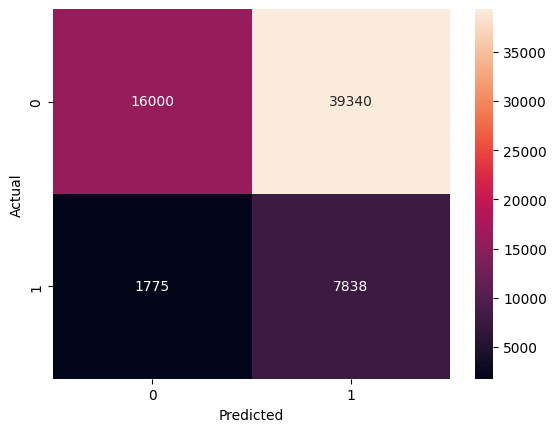

In [13]:
# Plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


There's a better accuracy for predicting the popular songs, but it's worse for the non popular songs

In [14]:
import numpy as np

Feature importance

In [16]:
# Extract the importance values 
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

print("Top 10 Important Features:")
for idx in sorted_idx[:10]:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

Top 10 Important Features:
region: 0.4418
key: 0.2949
instrumentalness: 0.0745
acousticness: 0.0272
mode: 0.0212
danceability: 0.0203
speechiness: 0.0174
duration_ms: 0.0170
energy: 0.0161
tempo: 0.0157


<Figure size 1000x800 with 0 Axes>

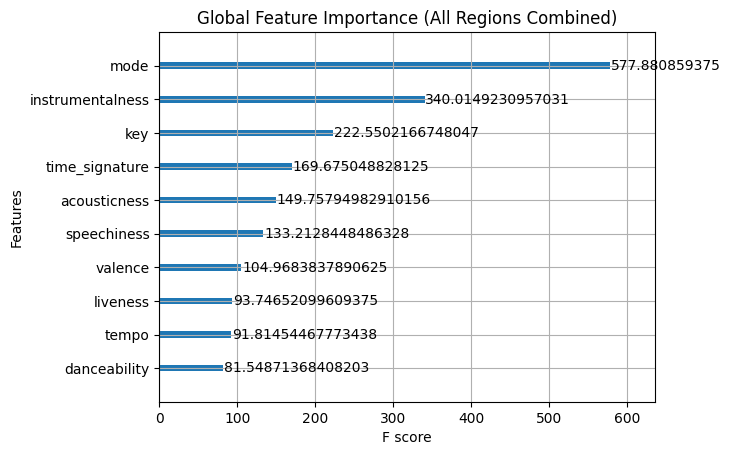

In [19]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Drop the 'region' column for global feature importance analysis
X_global = df.drop(columns=['popular', 'region'])
y_global = df['popular']

# Train-test split
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(X_global, y_global, test_size=0.2, random_state=42)

# SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_global, y_train_global)

# Initialize and train the XGBoost model
model_global = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=4,  # Adjust based on imbalance
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_global.fit(X_train_resampled, y_train_resampled)

# Plot global feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model_global, max_num_features=10, importance_type="gain")
plt.title("Global Feature Importance (All Regions Combined)")
plt.show()


<Figure size 1000x800 with 0 Axes>

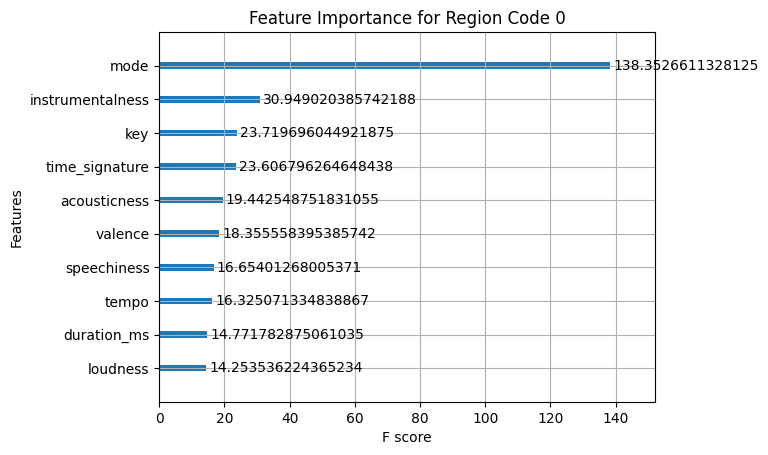

<Figure size 1000x800 with 0 Axes>

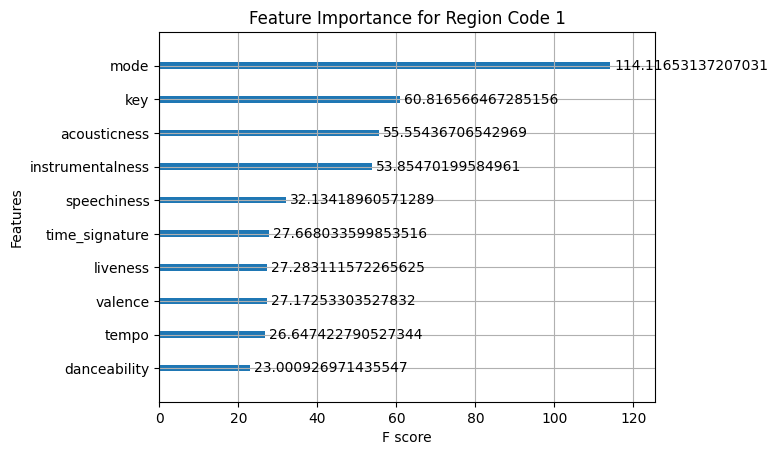

<Figure size 1000x800 with 0 Axes>

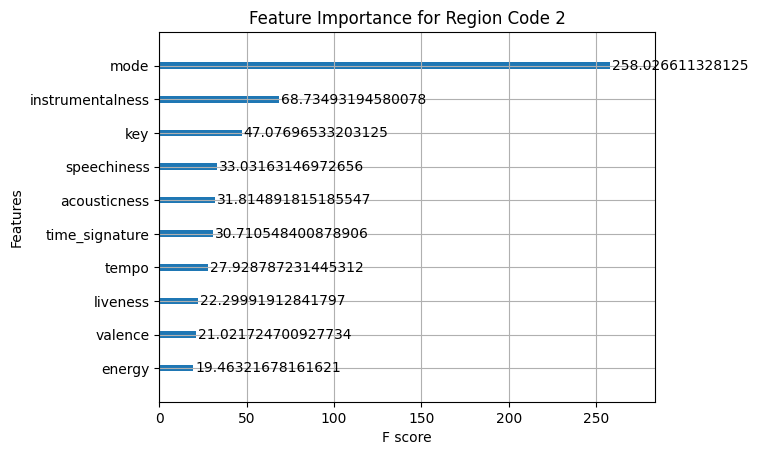

<Figure size 1000x800 with 0 Axes>

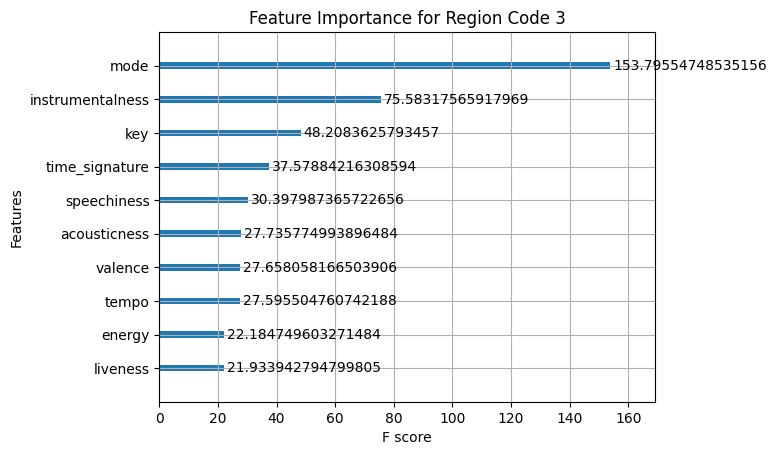

<Figure size 1000x800 with 0 Axes>

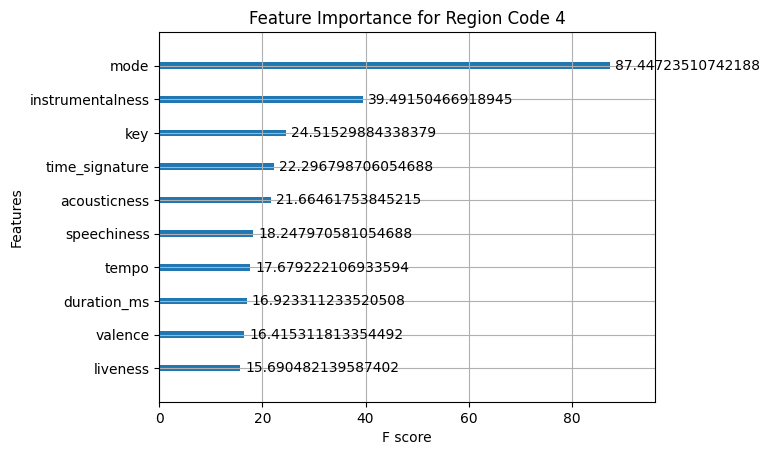

<Figure size 1000x800 with 0 Axes>

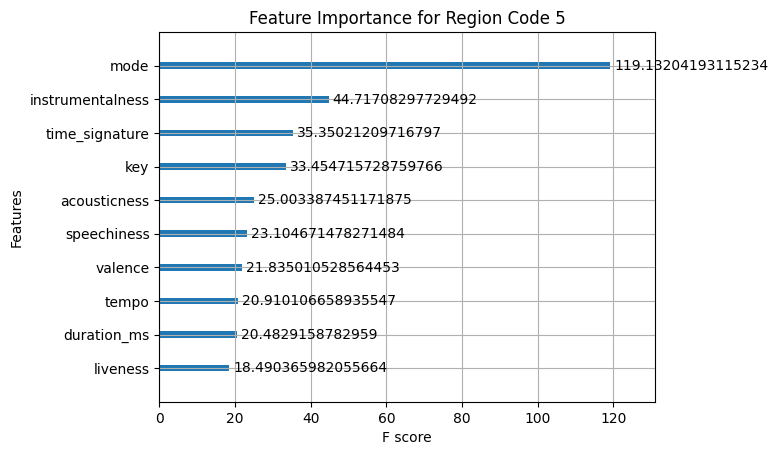

<Figure size 1000x800 with 0 Axes>

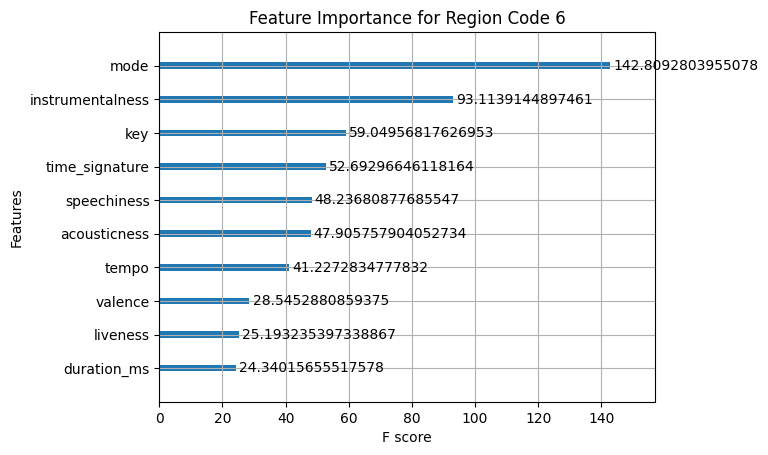

<Figure size 1000x800 with 0 Axes>

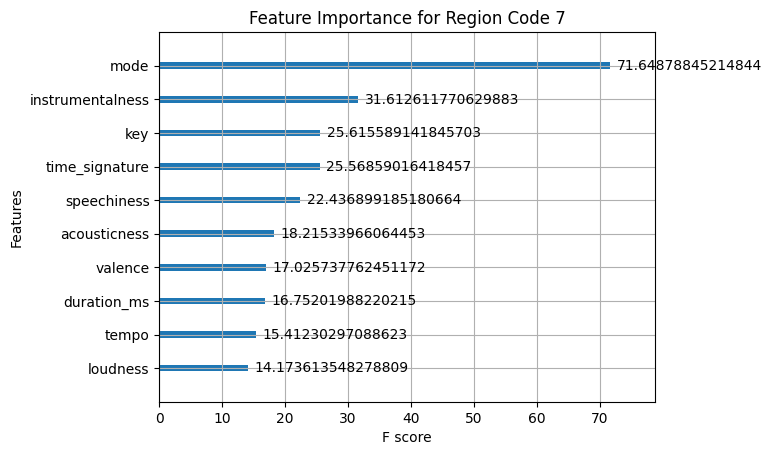

<Figure size 1000x800 with 0 Axes>

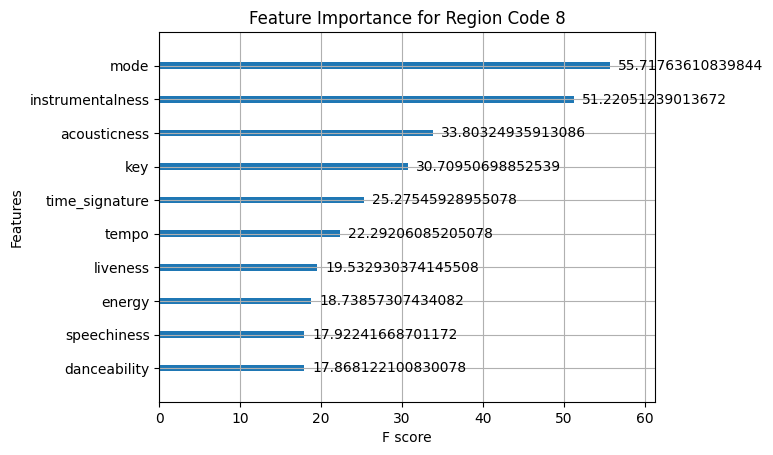

<Figure size 1000x800 with 0 Axes>

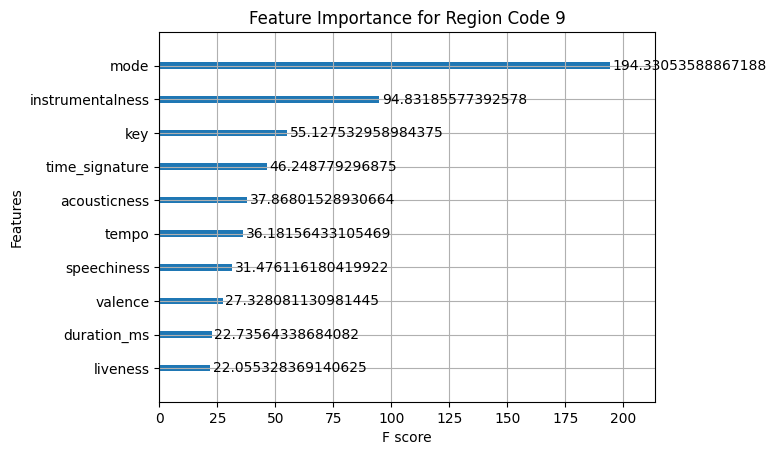

<Figure size 1000x800 with 0 Axes>

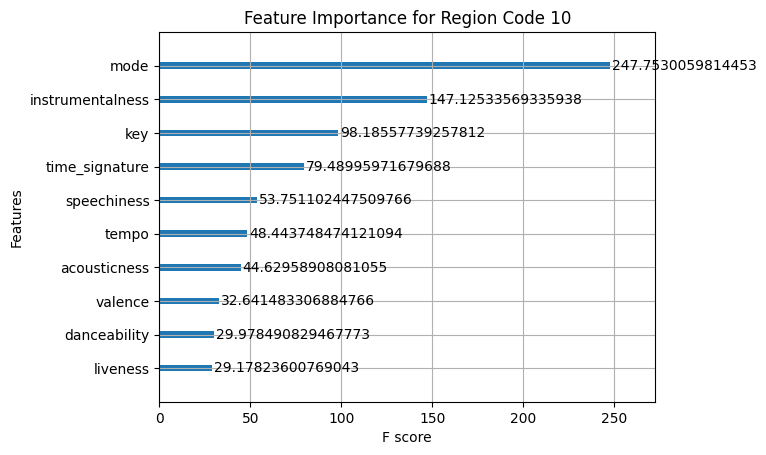


Top 10 Important Features for Africa:
mode: 0.3895
instrumentalness: 0.0871
key: 0.0668
time_signature: 0.0665
acousticness: 0.0547
valence: 0.0517
speechiness: 0.0469
tempo: 0.0460
duration_ms: 0.0416
loudness: 0.0401

Top 10 Important Features for East Asia:
mode: 0.2234
key: 0.1191
acousticness: 0.1088
instrumentalness: 0.1054
speechiness: 0.0629
time_signature: 0.0542
liveness: 0.0534
valence: 0.0532
tempo: 0.0522
danceability: 0.0450

Top 10 Important Features for Eastern Europe:
mode: 0.4199
instrumentalness: 0.1119
key: 0.0766
speechiness: 0.0538
acousticness: 0.0518
time_signature: 0.0500
tempo: 0.0455
liveness: 0.0363
valence: 0.0342
energy: 0.0317

Top 10 Important Features for Latin America:
mode: 0.2890
instrumentalness: 0.1420
key: 0.0906
time_signature: 0.0706
speechiness: 0.0571
acousticness: 0.0521
valence: 0.0520
tempo: 0.0519
energy: 0.0417
liveness: 0.0412

Top 10 Important Features for Middle East:
mode: 0.2707
instrumentalness: 0.1223
key: 0.0759
time_signature: 0

In [20]:
# Dictionary to store feature importance by region
regional_feature_importance = {}

# Loop through each region code (0 to 10) and train a model
for region_code in range(11):
    # Filter data for the current region
    df_region = df[df['region'] == region_code]
    X_region = df_region.drop(columns=['popular', 'region'])
    y_region = df_region['popular']
    
    # Train-test split
    X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(X_region, y_region, test_size=0.2, random_state=42)
    
    # SMOTE for class imbalance within each region
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_region, y_train_region)

    # Initialize and train the XGBoost model for this region
    model_region = xgb.XGBClassifier(
        objective='binary:logistic',
        scale_pos_weight=4,  # Adjust based on regional imbalance if needed
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    model_region.fit(X_train_resampled, y_train_resampled)
    
    # Store feature importance for this region
    regional_feature_importance[region_code] = model_region.feature_importances_

    # Plot feature importance for this region
    plt.figure(figsize=(10, 8))
    xgb.plot_importance(model_region, max_num_features=10, importance_type="gain")
    plt.title(f"Feature Importance for Region Code {region_code}")
    plt.show()

# Mapping region codes back to names for easier interpretation
region_names = {0: 'Africa', 1: 'East Asia', 2: 'Eastern Europe', 3: 'Latin America', 4: 'Middle East',
                5: 'North America', 6: 'Northern Europe', 7: 'Oceania', 8: 'South Asia', 9: 'Southern Europe', 10: 'Western Europe'}

# Optional: Print out feature importances for each region in a readable format
for region_code, importance in regional_feature_importance.items():
    sorted_idx = np.argsort(importance)[::-1]
    print(f"\nTop 10 Important Features for {region_names[region_code]}:")
    for idx in sorted_idx[:10]:
        print(f"{X_region.columns[idx]}: {importance[idx]:.4f}")
